In [2]:
import os
import torch, torchvision
from torchvision import transforms, datasets

In [3]:
save_path = "../data/mnist"
if not os.path.exists(save_path):
    os.mkdir(save_path)

train = datasets.MNIST("../data/mnist", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("../data/mnist", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

Processing...
Done!


In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=16, shuffle=True)

In [7]:
for data in trainset:
    x, y = data
    break

In [9]:
x.shape, y.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

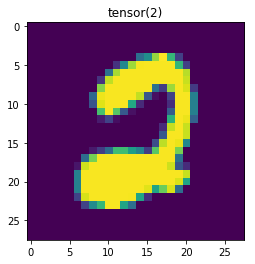

In [18]:
import matplotlib.pyplot as plt

plt.imshow(x[0][0])
plt.title(str(y[0]))
plt.show()

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.log_softmax(self.fc4(x), dim=1)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [32]:
output = net(x[0][0].view(-1, 28*28))
output

tensor([[-2.4318, -2.2943, -2.3755, -2.3100, -2.3472, -2.1997, -2.2545, -2.3601,
         -2.0895, -2.4135]], grad_fn=<LogSoftmaxBackward>)

In [33]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3)


In [37]:
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0765, grad_fn=<NllLossBackward>)
tensor(0.0118, grad_fn=<NllLossBackward>)
tensor(0.1248, grad_fn=<NllLossBackward>)


In [40]:
# Prediction
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
correct / total

0.9726